In [2]:
# importing requierd libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bank-full.csv')
print('Shape of our data {}'.format(data.shape))

Shape of our data (45211, 17)


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.describe(include='all')
Dataset Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
Attribute/Features Description:
Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.

#Bank client attributes:
#age: age of client (numeric)
#job : type of job (categorical)
#marital : marital status (categorical)
#education: client highest education (categorical)
#default: has credit in default? (binary/2-categories)
#balance: average yearly balance, in euros (numeric)
#housing: has housing loan? (binary/2-categories)
#loan: has personal loan? (binary/2-categories)

#Related with the last contact of the current campaign:
#contact: contact communication type (categorical)
#day: last contact day of the month (numeric)
#month: last contact month of year (categorical)
#duration: last contact duration, in seconds (numeric)

#Other attributes:
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#previous: number of contacts performed before this campaign and for this client (numeric)
#poutcome: outcome of the previous marketing campaign (categorical)

#Output variable (desired target):
#Target: has the client subscribed a term deposit? (binary/categorical)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
data.info()
#Data doesnot have any null or blank values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('Target')

In [9]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

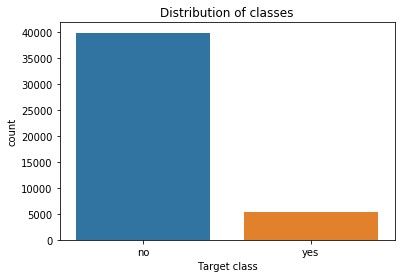

In [11]:
from matplotlib import pyplot as plt
sns.countplot(x=data['Target'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [13]:
data.Target.value_counts()

#Implies highly imbalanced dataset

no     39922
yes     5289
Name: Target, dtype: int64

Text(0.5, 0, 'Target: target variable')

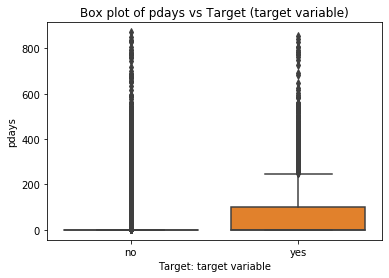

In [14]:
#pdays variable

sns.boxplot(y=data['pdays'], x=data['Target'])
plt.title('Box plot of pdays vs Target (target variable)')
plt.xlabel('Target: target variable')

Text(0.5, 1, 'PDF of pdays for target variable Target')

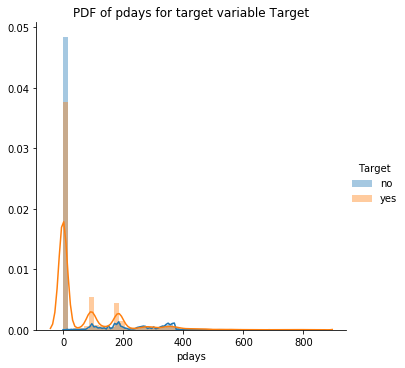

In [15]:
sns.FacetGrid(data, hue='Target', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable Target')

In [16]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [17]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, data.pdays.quantile(x/100)))
iqr = data.pdays.quantile(0.75) - data.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

#Observation:

#The attribute pdays seems to be important feature as there is a clear distinction in 
    #quartile ranges of pdays for target variable yes and no.
#75% clients contacted through campaign are not previously contacted.
#Mean of pdays is 40.20
#There are outliers as we can see from boxplot.

95% of pdays are less than equal to 317.0
96% of pdays are less than equal to 337.0
97% of pdays are less than equal to 349.0
98% of pdays are less than equal to 360.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


Text(0.5, 0, 'Target:target variable')

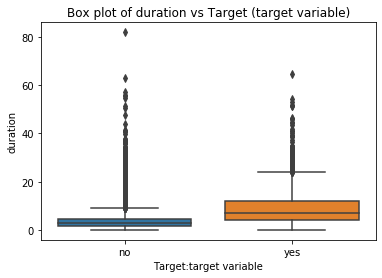

In [18]:
#duration variable 

#converting call duration from seconds to minute
data['duration'] = data['duration']/60
sns.boxplot(y=data['duration'], x=data['Target'])
plt.title('Box plot of duration vs Target (target variable)')
plt.xlabel('Target:target variable')

Text(0.5, 1, 'PDF of duration for target variable Target')

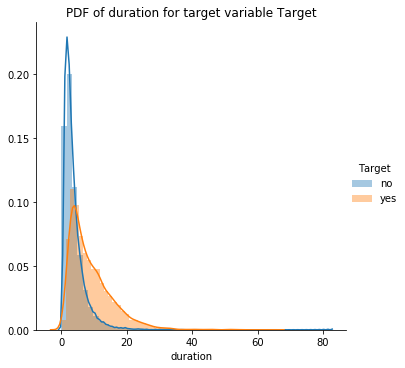

In [19]:
sns.FacetGrid(data, hue='Target', size=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable Target')

In [20]:
data.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [21]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

#Observation:

#The attribute duration seems to be important feature as there is a clear distinction in quartile ranges 
    #of duration for target variable yes and no.
#75% call duration are less than or equal to 5.32
#duration have a mean of 4.30 and standard-deviation 4.29
#There are outliers points in duration.

95% of calls have duration less than equal to 12.516666666666667
96% of calls have duration less than equal to 13.716666666666667
97% of calls have duration less than equal to 15.244999999999951
98% of calls have duration less than equal to 17.516666666666666
99% of calls have duration less than equal to 21.15
100% of calls have duration less than equal to 81.96666666666667
IQR 3.5999999999999996


Text(0.5, 0, 'Target:target variable')

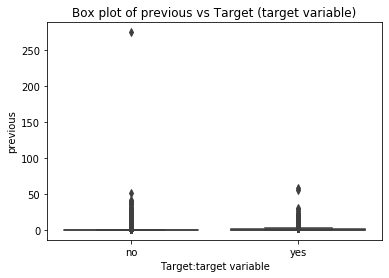

In [22]:
#previous variable

sns.boxplot(y=data['previous'], x=data['Target'])
plt.title('Box plot of previous vs Target (target variable)')
plt.xlabel('Target:target variable')

Text(0.5, 1, 'PDF of previous values for target variable Target')

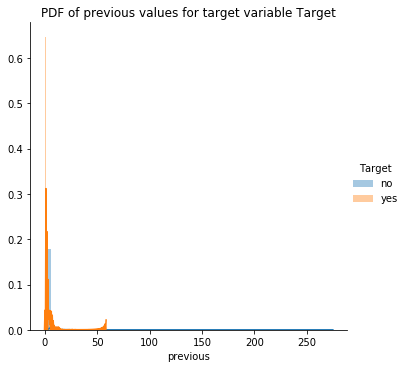

In [23]:
sns.FacetGrid(data, hue='Target', size=5) \
.map(sns.distplot, 'previous') \
.add_legend()
plt.title('PDF of previous values for target variable Target')

In [24]:
data.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [25]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, data.previous.quantile(x/100)))
iqr = data.previous.quantile(0.75) - data.previous.quantile(0.25)
print('IQR {}'.format(iqr))

#Observation:

#75% of previous values equal 0 and 99% values <= 8.90
#There are outliers points in duration.

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 8.900000000001455
100% of previous values less than equal to 275.0
IQR 0.0


Text(0.5, 0, 'Target:target variable')

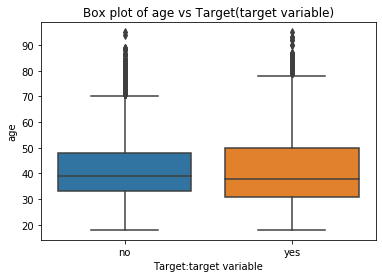

In [26]:
#age variable

sns.boxplot(y=data['age'], x=data['Target'])
plt.title('Box plot of age vs Target(target variable)')
plt.xlabel('Target:target variable')

Text(0.5, 1, 'PDF of age for target variable Target')

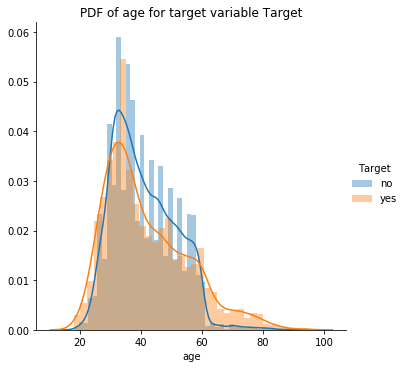

In [27]:
sns.FacetGrid(data, hue='Target', size=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable Target')

In [28]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [29]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [30]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [31]:
count_age_response_pct = pd.crosstab(data['Target'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

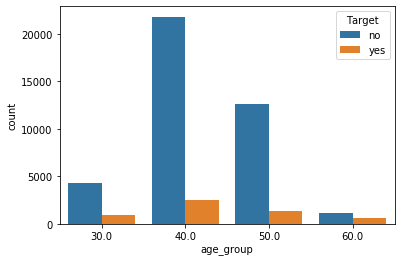

In [32]:
sns.countplot(x='age_group', data=data, hue='Target')

In [33]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].Target.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].Target.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].Target.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].Target.value_counts()[1]/len(data[data['age_group'] == 60])))

#Observation:

#People with age < 30 or 60+ have higher success rate.
#Only 3% of clients have age of 60+

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients of age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients of age 40-60 contacted: 13880, Success rate: 0.09402017291066282
Clients of 60+ age contacted: 1784, Success rate: 0.336322869955157


In [34]:
#job variable

data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

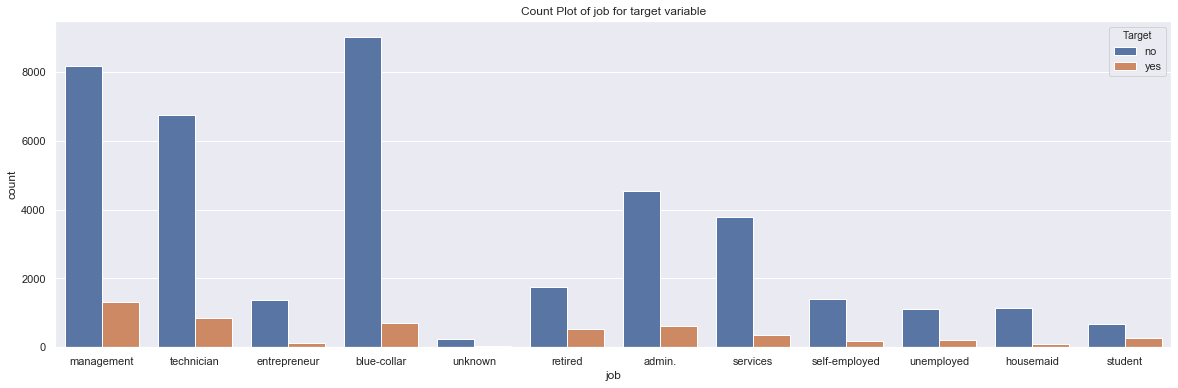

In [35]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['Target'])
plt.title('Count Plot of job for target variable')

In [54]:
print('Job',',', 'Total Clients',',', 'Success rate')
print('Blue-collar',',', len(data[data['job'] == 'blue-collar']),',', data[data['job'] == 'blue-collar'].Target.value_counts()[1]/len(data[data['job'] == 'blue-collar']))
print('Management',',', len(data[data['job'] == 'management']),',', data[data['job'] == 'management'].Target.value_counts()[1]/len(data[data['job'] == 'management']))
print('Technician',',', len(data[data['job'] == 'technician']),',', data[data['job'] == 'technician'].Target.value_counts()[1]/len(data[data['job'] == 'technician']))
print('Admin',',', len(data[data['job'] == 'admin.']),',', data[data['job'] == 'admin.'].Target.value_counts()[1]/len(data[data['job'] == 'admin.']))
print('Services',',', len(data[data['job'] == 'services']),',', data[data['job'] == 'services'].Target.value_counts()[1]/len(data[data['job'] == 'services']))
print('Retired',',', len(data[data['job'] == 'retired']),',', data[data['job'] == 'retired'].Target.value_counts()[1]/len(data[data['job'] == 'retired']))
print('Self-employed',',', len(data[data['job'] == 'self-employed']),',', data[data['job'] == 'self-employed'].Target.value_counts()[1]/len(data[data['job'] == 'self-employed']))
print('Entrepreneur',',', len(data[data['job'] == 'entrepreneur']),',', data[data['job'] == 'entrepreneur'].Target.value_counts()[1]/len(data[data['job'] == 'entrepreneur']))
print('Unemployed',',', len(data[data['job'] == 'unemployed']),',', data[data['job'] == 'unemployed'].Target.value_counts()[1]/len(data[data['job'] == 'unemployed']))
print('Housemaid',',', len(data[data['job'] == 'housemaid']),',', data[data['job'] == 'housemaid'].Target.value_counts()[1]/len(data[data['job'] == 'housemaid']))
print('Student',',', len(data[data['job'] == 'student']),',', data[data['job'] == 'student'].Target.value_counts()[1]/len(data[data['job'] == 'student']))
print('Unknown',',', len(data[data['job'] == 'unknown']),',', data[data['job'] == 'unknown'].Target.value_counts()[1]/len(data[data['job'] == 'unknown']))

#Observation:

#Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
#Success rate is highest for student

Job , Total Clients , Success rate
Blue-collar , 9732 , 0.07274969173859433
Management , 9458 , 0.13755550856417847
Technician , 7597 , 0.11056996182703699
Admin , 5171 , 0.12202668729452718
Services , 4154 , 0.08883004333172845
Retired , 2264 , 0.22791519434628976
Self-employed , 1579 , 0.11842938568714376
Entrepreneur , 1487 , 0.08271687962340282
Unemployed , 1303 , 0.15502686108979277
Housemaid , 1240 , 0.08790322580645162
Student , 938 , 0.2867803837953092
Unknown , 288 , 0.11805555555555555


In [55]:
#poutcome variable

data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

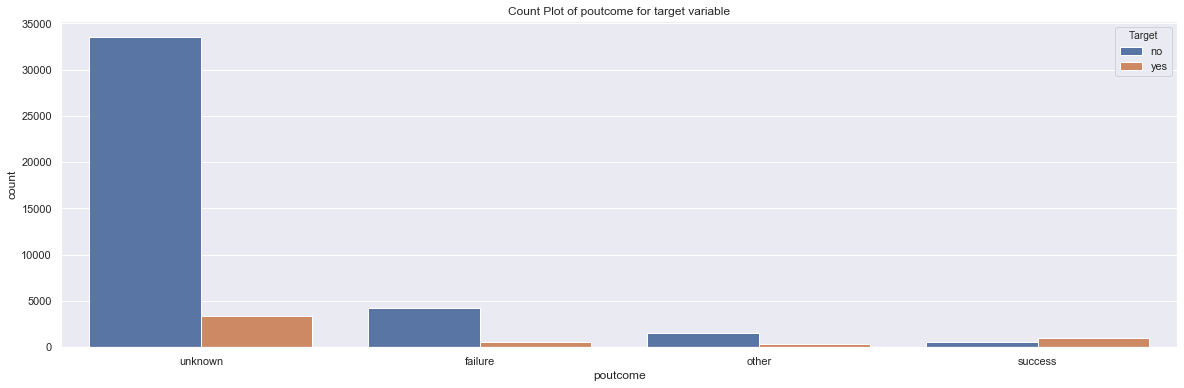

In [57]:
sns.countplot(x=data['poutcome'], data=data, hue=data['Target'])
plt.title('Count Plot of poutcome for target variable')

#Observation:

#Most of the clients contacted have previous outcome as 'unknown'.

In [58]:
#education variable

data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable Target')

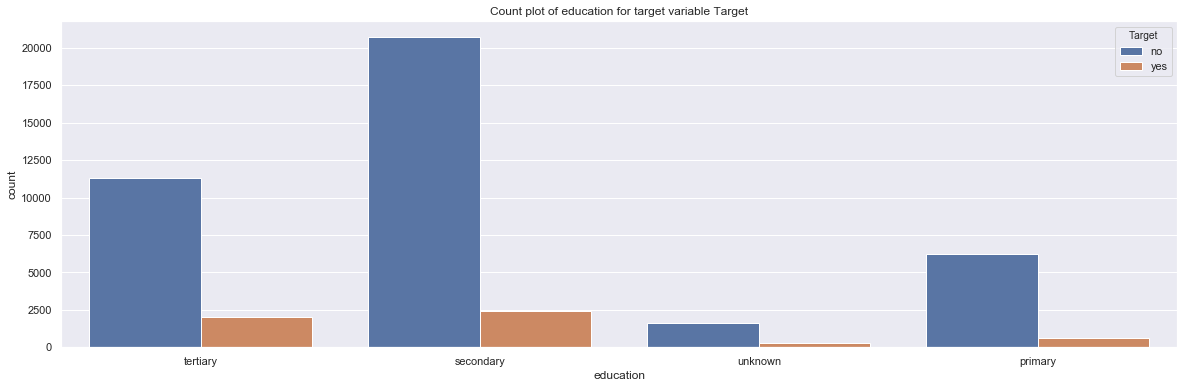

In [59]:
sns.countplot(x=data['education'], data=data, hue=data['Target'])
plt.title('Count plot of education for target variable Target')

#Observation:

#Most of the people who are contacted have tertiray or secondary education.

In [60]:
#default variable

data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable Target')

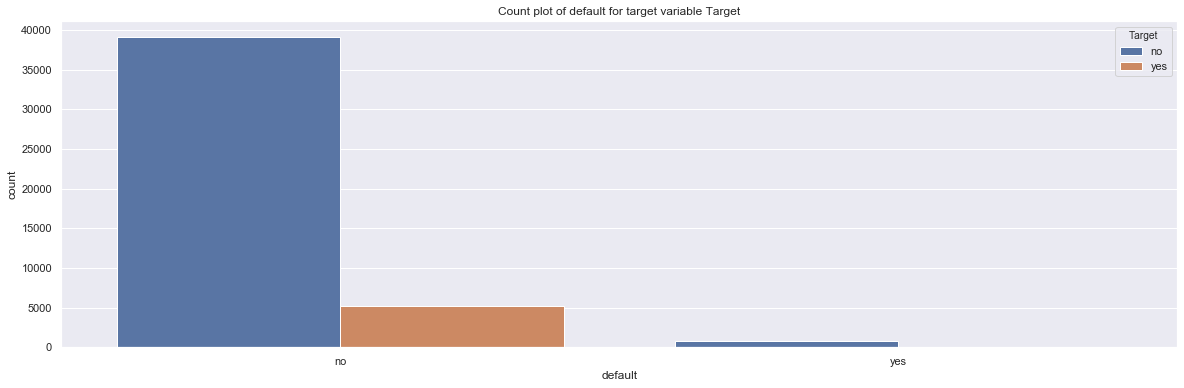

In [61]:
sns.countplot(x=data['default'], data=data, hue=data['Target'])
plt.title('Count plot of default for target variable Target')

In [62]:
data[data['default'] == 'yes'].Target.count()

#Observation:

#Very few clients are contacted who are defaulter

815

In [63]:
#loan variable

data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable Target')

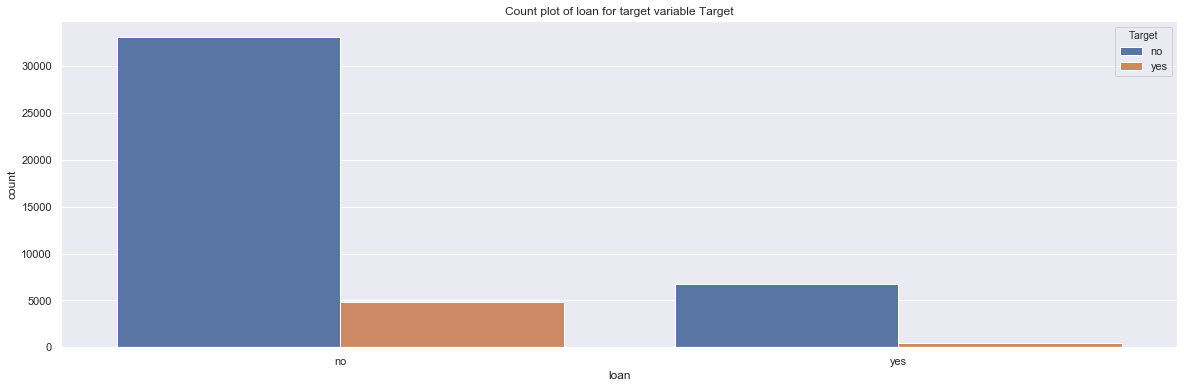

In [64]:
sns.countplot(x=data['loan'], data=data, hue=data['Target'])
plt.title('Count plot of loan for target variable Target')

#Observation:

#As seen for default variable, less client are contacted who have loan.

In [65]:
#contact variable

data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of contact for target variable Target')

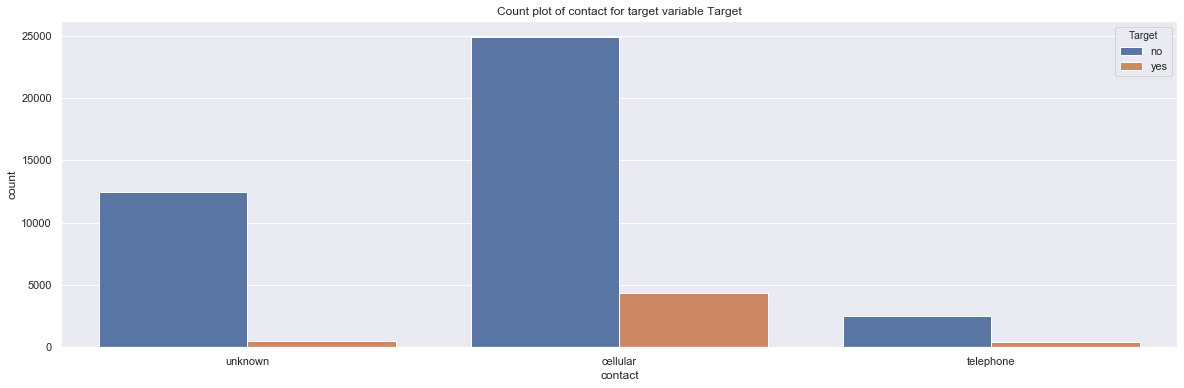

In [66]:
sns.countplot(x=data['contact'], data=data, hue=data['Target'])
plt.title('Count plot of contact for target variable Target
          
#Observation:
          
#Most of the people are contacted through cellular

In [67]:
#month variable

data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable Target')

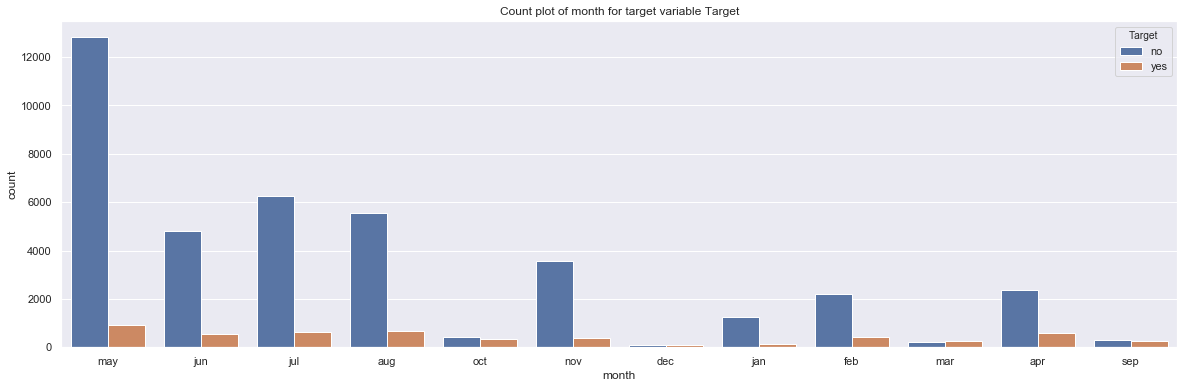

In [68]:
sns.countplot(x=data['month'], data=data, hue=data['Target'])
plt.title('Count plot of month for target variable Target')

In [69]:
data[data['month'] == 'jan'].Target.value_counts()

no     1261
yes     142
Name: Target, dtype: int64

In [70]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(data[data['month'] == 'jan']), data[data['month'] == 'jan'].Target.value_counts()[1]/len(data[data['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(data[data['month'] == 'feb']), data[data['month'] == 'feb'].Target.value_counts()[1]/len(data[data['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(data[data['month'] == 'mar']), data[data['month'] == 'mar'].Target.value_counts()[1]/len(data[data['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(data[data['month'] == 'apr']), data[data['month'] == 'apr'].Target.value_counts()[1]/len(data[data['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(data[data['month'] == 'may']), data[data['month'] == 'may'].Target.value_counts()[1]/len(data[data['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(data[data['month'] == 'jun']), data[data['month'] == 'jun'].Target.value_counts()[1]/len(data[data['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(data[data['month'] == 'jul']), data[data['month'] == 'jul'].Target.value_counts()[1]/len(data[data['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(data[data['month'] == 'aug']), data[data['month'] == 'aug'].Target.value_counts()[1]/len(data[data['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(data[data['month'] == 'sep']), data[data['month'] == 'sep'].Target.value_counts()[1]/len(data[data['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(data[data['month'] == 'oct']), data[data['month'] == 'oct'].Target.value_counts()[1]/len(data[data['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(data[data['month'] == 'nov']), data[data['month'] == 'nov'].Target.value_counts()[1]/len(data[data['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(data[data['month'] == 'dec']), data[data['month'] == 'dec'].Target.value_counts()[1]/len(data[data['month'] == 'dec'])))

#Observation:

#Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
#March have highest success rate.

Success rate and total clients contacted for different months:
Clients contacted in January: 1403, Success rate: 0.10121168923734854
Clients contacted in February: 2649, Success rate: 0.1664779161947905
Clients contacted in March: 477, Success rate: 0.480083857442348
Clients contacted in April: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in June: 5341, Success rate: 0.10222804718217562
Clients contacted in July: 6895, Success rate: 0.09093546047860769
Clients contacted in August: 6247, Success rate: 0.11013286377461182
Clients contacted in September: 579, Success rate: 0.46459412780656306
Clients contacted in October: 738, Success rate: 0.43766937669376693
Clients contacted in November: 3970, Success rate: 0.10151133501259446
Clients contacted in December: 214, Success rate: 0.4672897196261682


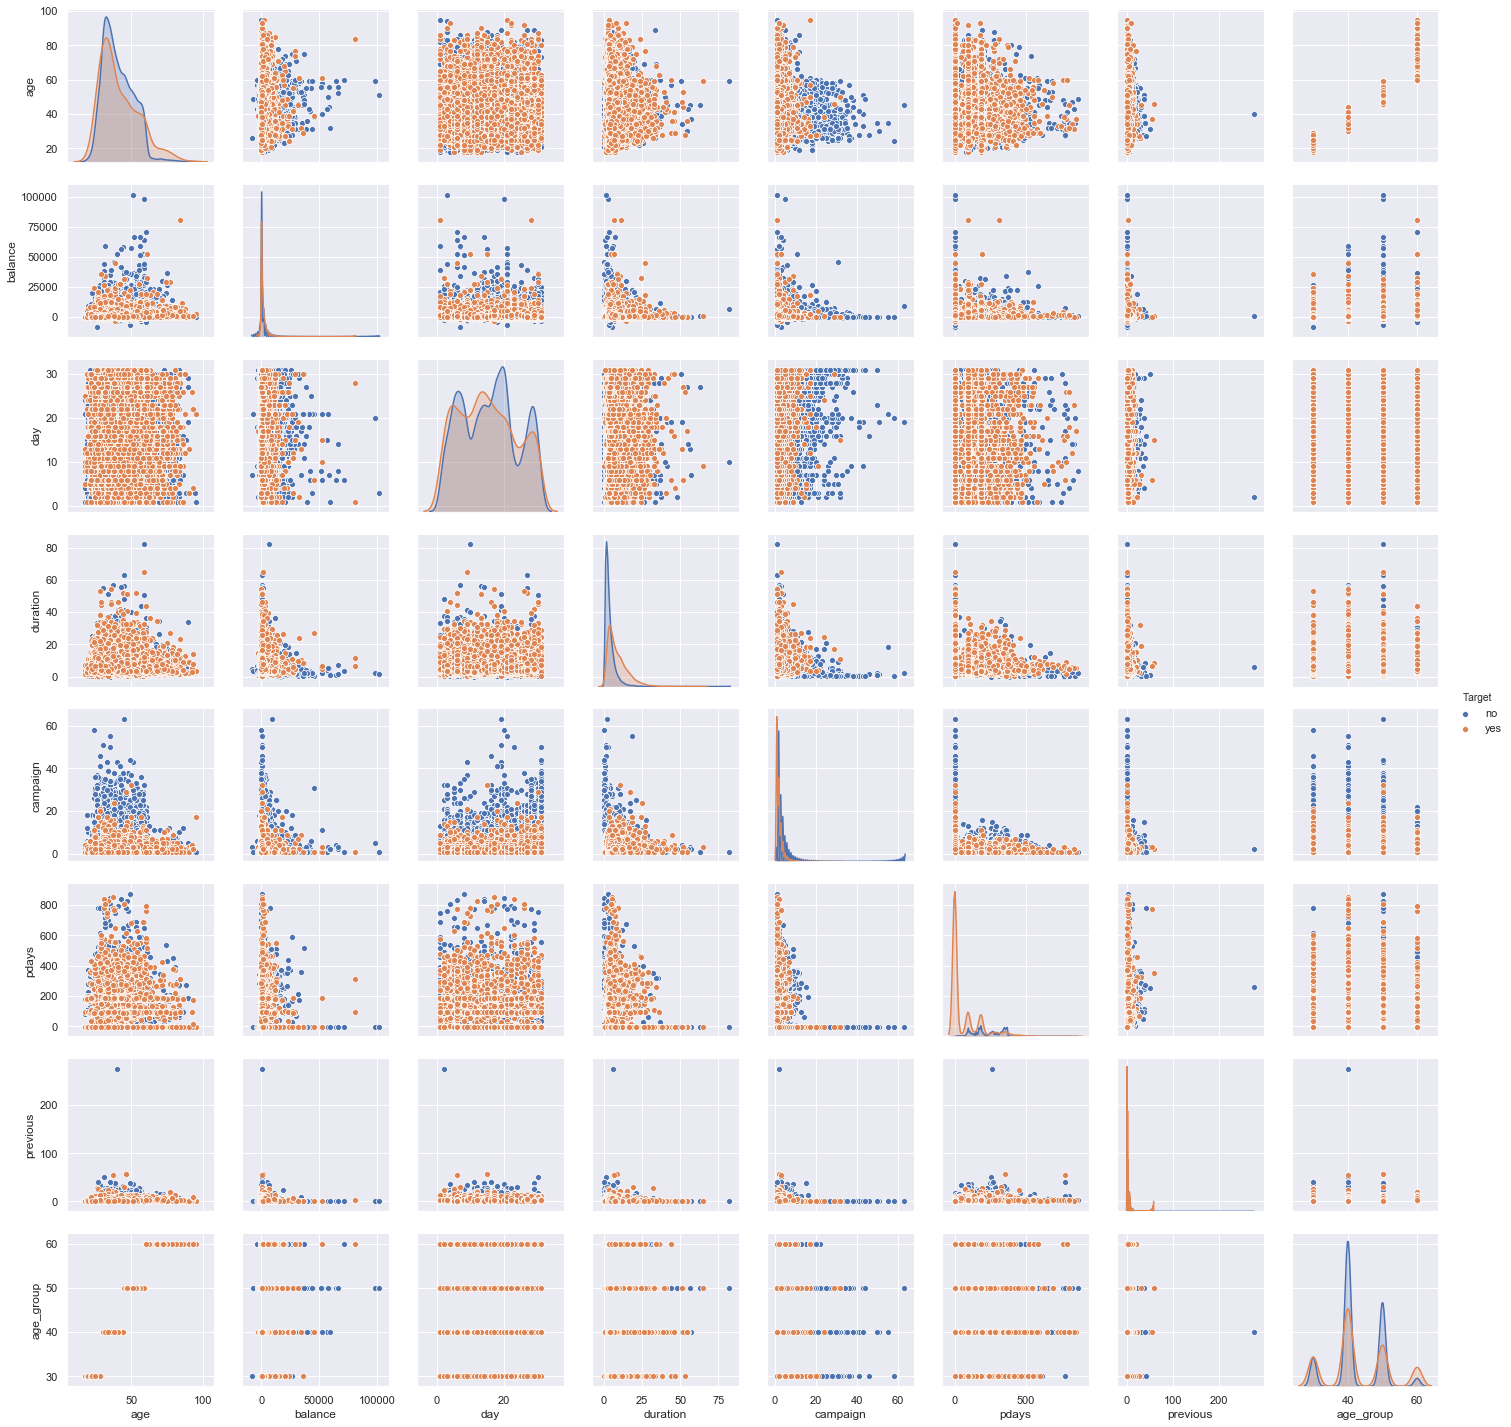

In [72]:
#pair plot

#data.drop('age_group', axis=1, inplace=True)
sns.pairplot(data, hue='Target')

#Observation:

#For most of the variables our pair plot is overlapping a lot.
#Pair plots of age-campaign and day-campaign are much efficient 
    #in distinguishing between different classes with very few overlapes.

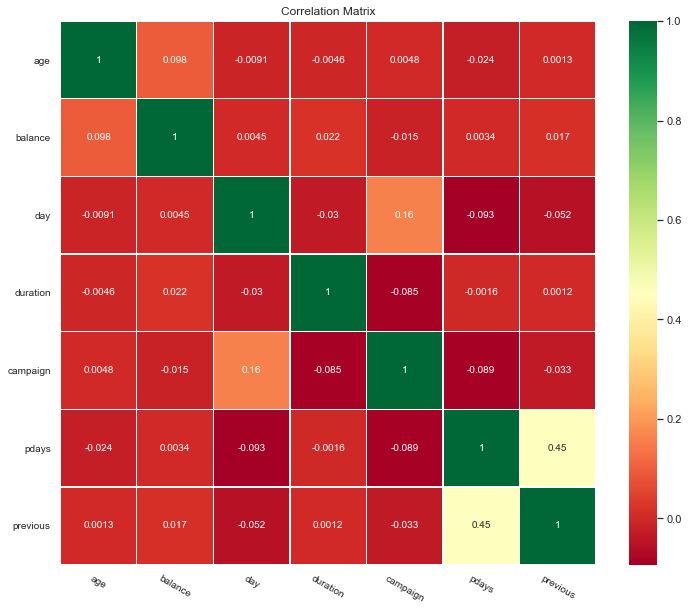

In [74]:
#Correlation matrix for numerical variables

corr_data = data[numerical + ['Target']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

#Observation:

#Over numerical features have very less correlation between them.
#pdays and previous have higher correlation
#duration have a higher correlation with our target variable

In [75]:
#Outlier detection

# creating new data frame of numerical columns 
data_numerical = data[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (45211, 7)


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,4.350000,1,-1,0
1,44,29,5,2.516667,1,-1,0
2,33,2,5,1.266667,1,-1,0
3,47,1506,5,1.533333,1,-1,0
4,33,1,5,3.300000,1,-1,0


In [76]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration       3.6
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [77]:
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))

17029 points are outliers based on IQR


In [78]:
data.shape

(45211, 18)

In [93]:
data = data.drop('age_group',axis=1)

In [94]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,0


In [107]:
#Data pre-processing

#Split data into train and test dataset
data.replace(to_replace={'Target':'yes'}, value=1, inplace=True)
data.replace(to_replace={'Target':'no'}, value=0, inplace=True)

In [108]:
# Convert the columns into categorical variables
data1 = data.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [121]:
y = data1['Target']
x_train, x_test, y_train, y_test = train_test_split(data1.drop(['Target'], axis=1), y, test_size=0.20, random_state=42)

In [122]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 16) (36168,)
Test data shape (9043, 16) (9043,)


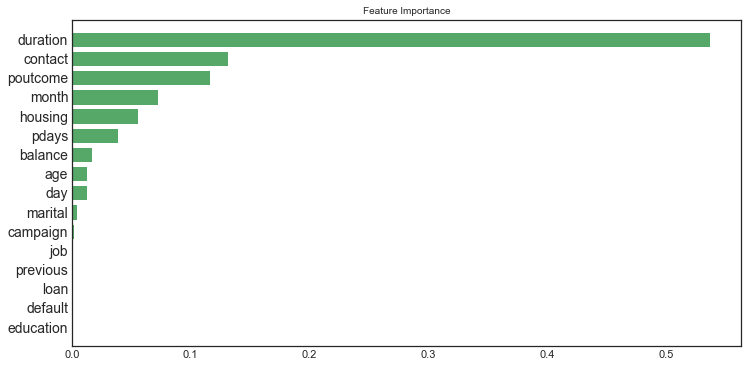

In [124]:
#Check for Feature Importance

plt.style.use('seaborn-white')

clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = data1.drop('Target', axis=1).columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

#Important features we are going to consider for machine learning models:

#duration
#contact
#poutcome
#month
#housing
#pdays
#balance
#age
#day

In [142]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3344,41,1,1,0,0,849,1,0,2,15,8,1.200000,1,-1,0,3
17965,49,9,1,0,0,1415,1,0,0,30,5,4.483333,2,-1,0,3
18299,42,0,1,1,0,3842,0,0,0,31,5,2.166667,4,-1,0,3
10221,37,4,2,2,0,-119,1,0,2,11,6,6.250000,11,-1,0,3
32192,56,1,1,0,0,3498,0,0,0,15,0,4.400000,2,-1,0,3


In [150]:
train = x_train[['contact','poutcome','month','housing','duration','pdays','age','balance']].copy()

In [151]:
test = x_test[['contact','poutcome','month','housing','duration','pdays','age','balance']].copy()

In [152]:
#dictionary to store accuracy and roc score for each model
score = {}

In [186]:
#Machine Learning Models

#Logistic Regression
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model_LR = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model_LR, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))


Best parameters:  {'C': 0.5}
Best score: 0.8626882096577773


**************************************************
Train AUC: 0.863
Test AUC: 0.858
**************************************************
Train Accuracy: 0.802
Test Accuracy: 0.792


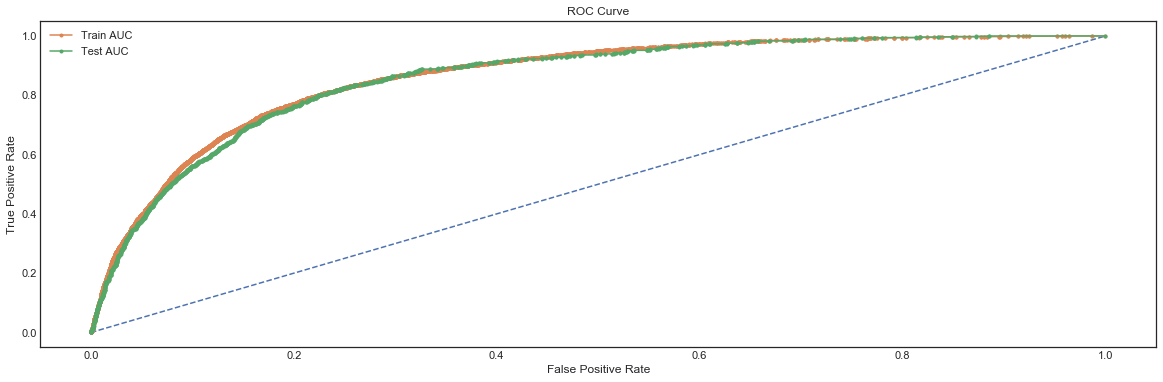

In [187]:
from sklearn.metrics import log_loss

model_LR = LogisticRegression(C=3, class_weight='balanced', n_jobs=-1)
model_LR.fit(train, y_train)
y_probs_train = model_LR.predict_proba(train)
y_probs_test = model_LR.predict_proba(test)
y_predicted_train = model_LR.predict(train)
y_predicted_test = model_LR.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[25781  6189]
 [  990  3208]]


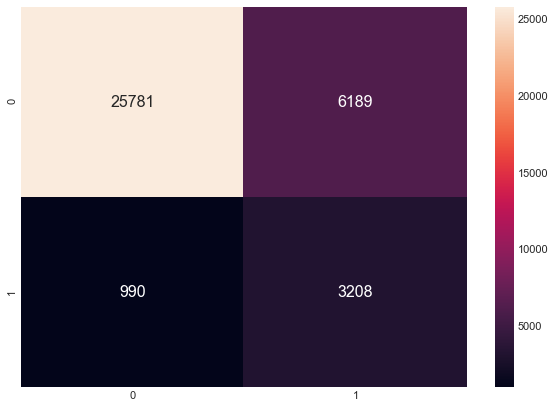

In [188]:
#Train Confusion Matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[6330 1622]
 [ 256  835]]


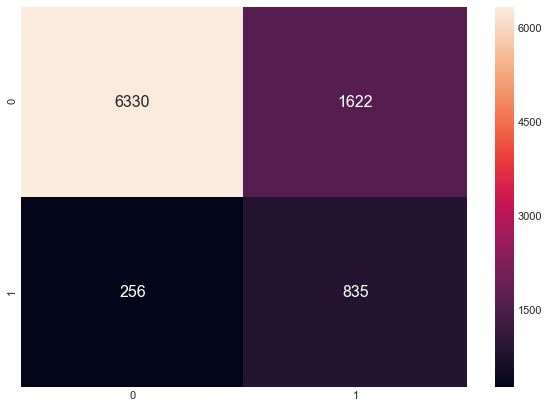

In [189]:
#Test Confusion Matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [190]:
#Random Forest

params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model_RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model_RF, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 250, 'max_depth': 25}
Best score: 0.9177956015672032


**************************************************
Train AUC: 1.000
Test AUC: 0.913
**************************************************
Train Accuracy: 1.000
Test Accuracy: 0.899


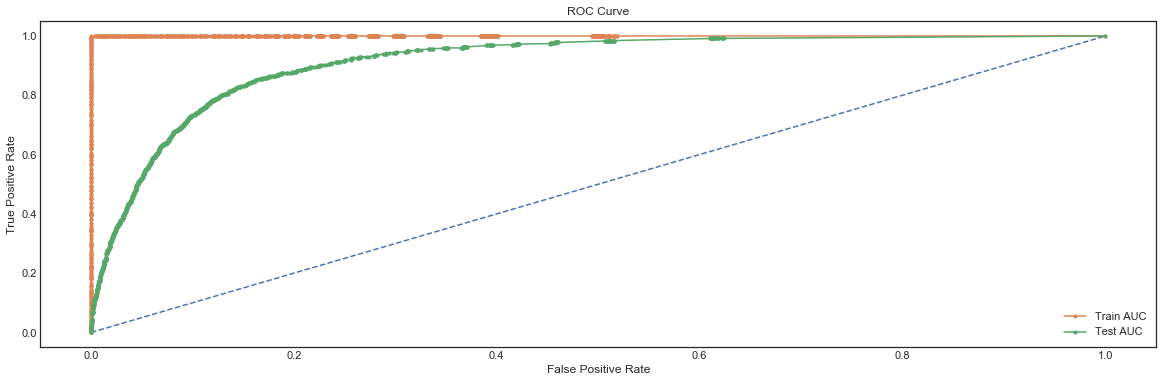

In [191]:
model_RF = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model_RF.fit(train, y_train)
y_probs_train = model_RF.predict_proba(train)
y_probs_test = model_RF.predict_proba(test)
y_predicted_train = model_RF.predict(train)
y_predicted_test = model_RF.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[31968     2]
 [    0  4198]]


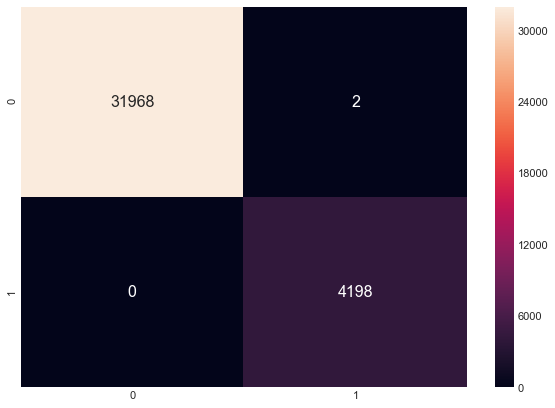

In [192]:
#Train Confusion Matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[7684  268]
 [ 646  445]]


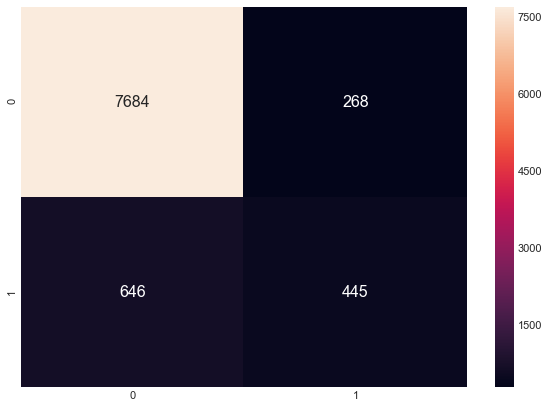

In [193]:
#Test Confusion Matrix
from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [205]:
#Support Vector Machine

params = {'alpha': [10**i for i in range(-4, 5)]}

model_SVM = SGDClassifier(class_weight='balanced', n_jobs=-1, loss='log')
clf = RandomizedSearchCV(model_SVM, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'alpha': 100}
Best score: 0.7071120588234435


**************************************************
Train AUC: 0.637
Test AUC: 0.646
**************************************************
Train Accuracy: 0.340
Test Accuracy: 0.335


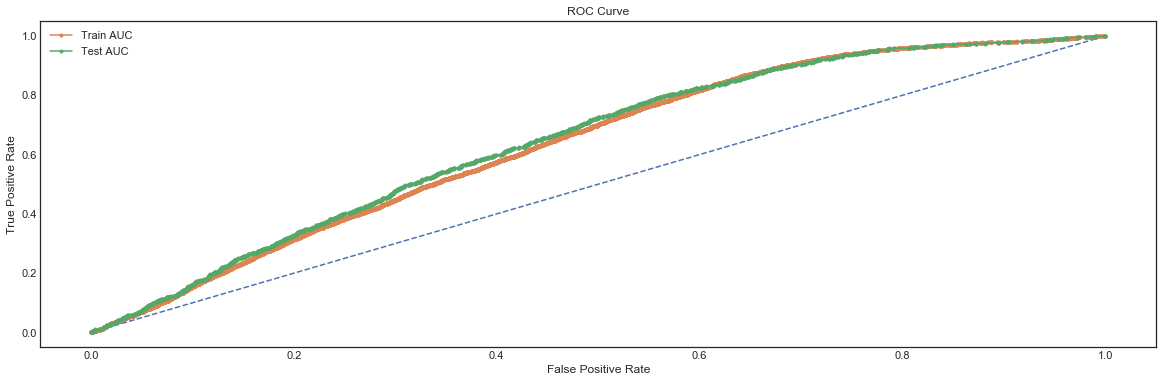

In [206]:
model_SVM = SGDClassifier(alpha=0.0001, class_weight='balanced', n_jobs=-1, loss='log')
model_SVM.fit(train, y_train)
y_probs_train = model_SVM.decision_function(train)
y_probs_test = model_SVM.decision_function(test)
y_predicted_train = model_SVM.predict(train)
y_predicted_test = model_SVM.predict(test)

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['SVM'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[ 8360 23610]
 [  274  3924]]


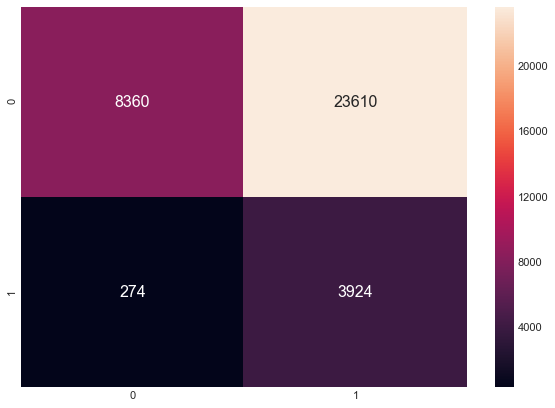

In [207]:
#Train confusion matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[2009 5943]
 [  69 1022]]


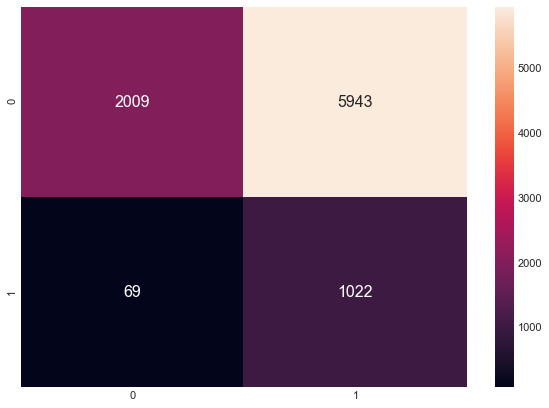

In [208]:
#Test Confusion Matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [198]:
#XG Boost

from xgboost import XGBClassifier

params = {'max_depth': [5, 10, 15], 'n_estimators': [10, 100, 500]}

model_XGB = XGBClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 100, 'max_depth': 5}
Best score: 0.9246880426859116


**************************************************
Train AUC: 0.942
Test AUC: 0.921
**************************************************
Train Accuracy: 0.918
Test Accuracy: 0.905


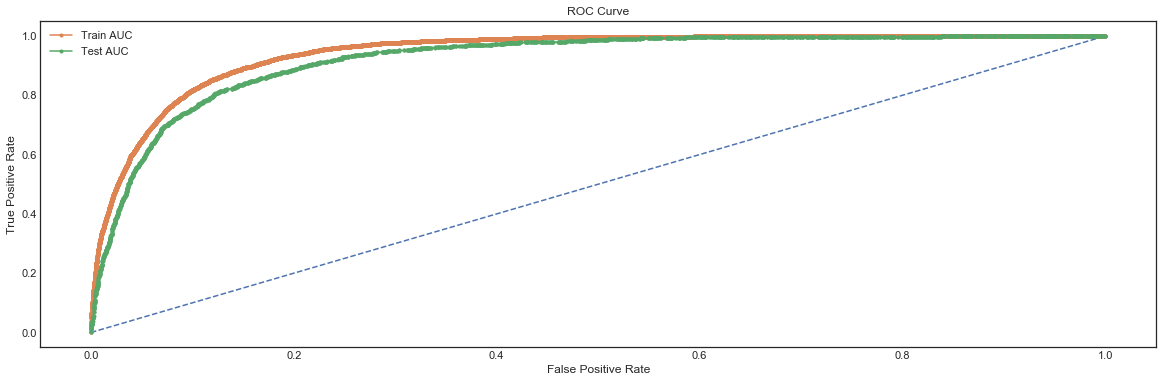

In [199]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(max_depth=5, n_estimators=100 ,class_weight='balanced', n_jobs=-1)
model_XGB.fit(train, y_train)
y_probs_train = model_XGB.predict_proba(train)
y_probs_test = model_XGB.predict_proba(test)
y_predicted_train = model_XGB.predict(train)
y_predicted_test = model_XGB.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[31216   754]
 [ 2207  1991]]


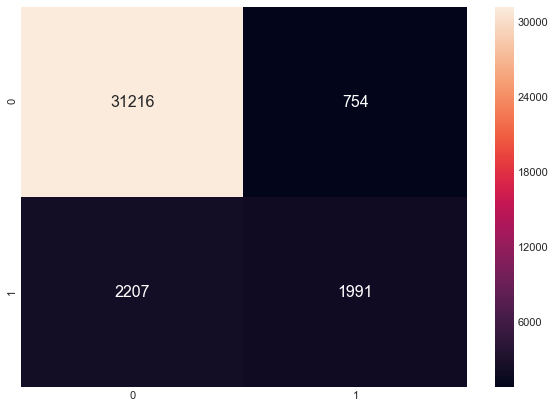

In [200]:
#Train confusion matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[7715  237]
 [ 619  472]]


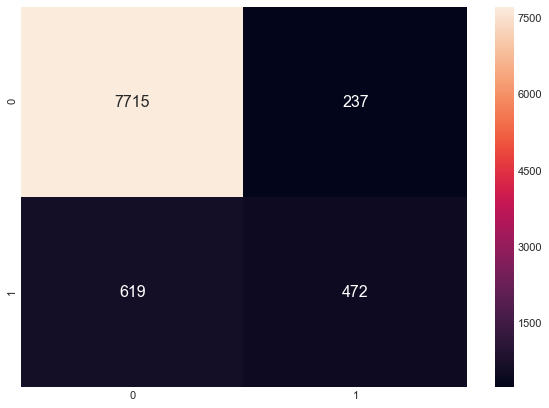

In [201]:
#Test confusion matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

**************************************************
Train AUC: 0.965
Test AUC: 0.893
**************************************************
Train Accuracy: 0.914
Test Accuracy: 0.868


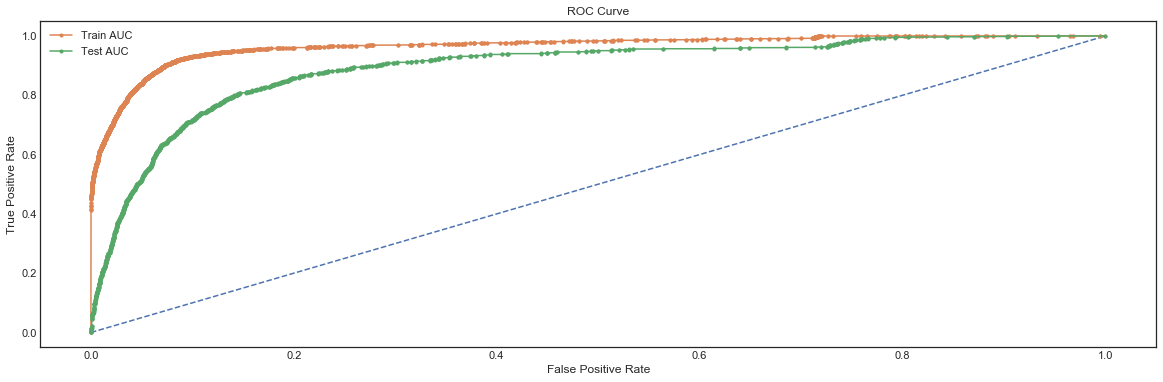

In [209]:
#Voting Classifier

from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('log reg',model_LR),('rf',model_RF),('xgb',model_XGB),('svm',model_SVM)],voting='soft')
model.fit(train, y_train)

y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)
score['Voting Classifier'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[29213  2757]
 [  340  3858]]


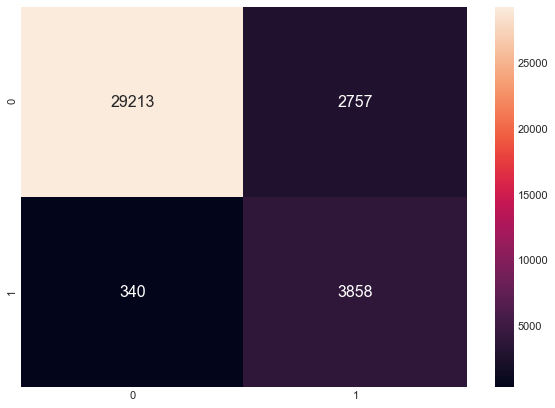

In [210]:
#Train confusion matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[7029  923]
 [ 273  818]]


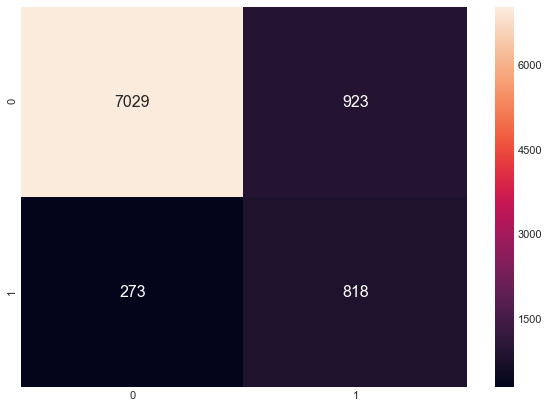

In [211]:
#Test Confusion matrix

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [214]:
print('***************  Comparison of different models  ****************')
print('Model','/', 'Test AUC','/', 'Test Accuracy')
for item in score.items():
    print(item[0],'/', item[1][0],'/', item[1][1])


***************  Comparison of different models  ****************
Model / Test AUC / Test Accuracy
Logistic Regression / 0.858232921820566 / 0.7923255556784253
Random Forest / 0.9125561688185944 / 0.8989273471193188
SVM / 0.6461064738568902 / 0.3351763795200708
XGBoost / 0.9207642740033234 / 0.9053411478491651
Voting Classifier / 0.892505007128011 / 0.8677430056397213


In [ ]:
#Conclusion
# 1) Our dataset consist of categorical and numerical features.
# 2) We have 16 independent features, out of these only half of them are important.
# 3) 'duration' is the most important feature while 'education' is the least important feature.
# 4) Month of May have seen the highest number of clients contacted but have the least success rate. 
    # Highest success rate is observed for end month of the financial year as well as the calendar year. 
    # So one can say that our dataset have some kind of seasonality.
# 5) When visualized age in groups, it is found that clients with age less than 30 and greater than 60 are 
    # less contacted through the campaign but have a higher success rate.
# 6) Different machine learning models are trained and tested on the dataset. 
    # Out of those XGBoost performs best. 
    # Random Forest and Ensemble Classifier are also important model as they result in high AUC score.
# 7) Different models are summarized in table above.